In [186]:
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON

In [187]:
api_key = '***************************'

In [188]:
channel_ids = ['UC7cs8q-gJRlGwj4A8OmCmXg', #more channel ids here
              ]

In [189]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)



In [152]:
def get_channel_stats(youtube, channel_ids):
    request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id=','.join(channel_ids)
    )
    response = request.execute()

    all_data = []
    
    for item in response['items']:
        data = {'channelName':item['snippet']['title'],
            'subscribers':item['statistics']['subscriberCount'],
            'views':item['statistics']['viewCount'],
            'videoCount':item['statistics']['videoCount'],
            'playlistid':item['contentDetails']['relatedPlaylists']['uploads']
           }
        all_data.append(data)

    return(pd.DataFrame(all_data))

    

In [153]:
channel_stats = get_channel_stats(youtube,channel_ids)


In [154]:
print(channel_stats)

        channelName subscribers     views videoCount                playlistid
0  Alex The Analyst      711000  30605533        286  UU7cs8q-gJRlGwj4A8OmCmXg


In [155]:
def get_all_video_ids(youtube, playlist_id):
    
    video_ids = []
    
    request = youtube.playlistItems().list(
        part="snippet, contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()

    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
            part="contentDetails",
            playlistId=playlist_id,
            maxResults = 50,
            pageToken = next_page_token)
        response = request.execute()
        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])
        next_page_token = response.get('nextPageToken')

    return video_ids

In [156]:
playlist_id = "UU7cs8q-gJRlGwj4A8OmCmXg"

video_ids = get_all_video_ids(youtube, playlist_id)

In [157]:
len(video_ids)

286

In [158]:
video_ids

['FGC0cCAgGu0',
 'Vj6RqA_X-IE',
 'RYIiOG4LsvQ',
 '5y7tLNPVJPA',
 '_nf56aMPdZE',
 'XbDRYzYUmMo',
 'KRXSJb9ql1Y',
 'iTQW_nDp938',
 'lXQzD09BOH0',
 'xtC3212t4hI',
 'KZKizyBS9YM',
 'I0_ca6iyo6w',
 'GZS7AgQ4Ksg',
 'fT-8mRf_-Hk',
 'ZHaYOC0H5KE',
 'K0-8G3DgjA4',
 'ZnAydTqCtFU',
 'qPOmj22QX04',
 'XD1ul5fpnGI',
 'kifhSqep9UM',
 'dCNjUOc1cBY',
 'lEjmgE-hogg',
 'qxj3dx0c7RM',
 'zgYqUP_PhQo',
 'MARn_mssG4A',
 'TGAUZQJaQbQ',
 'HYD8KjPB9F8',
 'wgRwITQHszU',
 '1LG65qXfeQY',
 'QzLz-W29Tww',
 'ukIUVW2E-n0',
 'aofB2t5o2ao',
 '-DwpkgtJjGw',
 'h4KTy2wxYcQ',
 'LaRXtE4OG9A',
 'J0PcCv9f4JQ',
 '_DGn-7134i0',
 'EflE8U30pBo',
 'j_sHaBJEHMk',
 'xuyKzpJ2SaY',
 'D0mEy6bJ2lA',
 'GaoAc3-hScQ',
 'bxIF9X9k2IE',
 'z_xWpa88R0A',
 '7PoZBuIUnEU',
 'fq1-e-GbihE',
 'Xkb6h3YXl_c',
 'qDprq7Xbrqw',
 'UOHxb9ndpMM',
 '_h_A_n8Z9QQ',
 '_oCUSMX4_3k',
 'OnS01G8W6nw',
 'ugkyfUTc6AU',
 'eON-PNPae8Y',
 '41nX2ZgGzcE',
 'Le35Qsgs2lM',
 'nufF-juSZxU',
 '9NB5u17qiDY',
 'YDvJqgBv0Uc',
 'j6A28L6Tmxw',
 'W_s4c1vLGXM',
 'DWte9zjGl0I',
 'Ezeeyp

In [165]:
def get_video_details(youtube, video_ids):

    all_video_info = []
    
    for i in range(0,len(video_ids),50):
        request = youtube.videos().list(
            part="snippet, contentDetails, statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute()
            
        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title','description', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favoriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption'] }
            video_info = {}
            video_info['video_id'] = video['id']
        
            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    video_info[v] = video[k][v]
        
            all_video_info.append(video_info)
    
    return pd.DataFrame(all_video_info)

In [166]:
video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,FGC0cCAgGu0,Alex The Analyst,Twitter making me tear up over here 🥹,,2024-02-23T13:34:27Z,3058,168,0,11,PT16S,hd,false
1,Vj6RqA_X-IE,Alex The Analyst,Subqueries in MySQL | Intermediate MySQL,Full MySQL Course: https://www.analystbuilder....,2024-02-20T13:00:32Z,5635,177,0,17,PT11M1S,hd,false
2,RYIiOG4LsvQ,Alex The Analyst,Case Statements in MySQL | Intermediate MySQL,Full MySQL Course: https://www.analystbuilder....,2024-02-13T13:00:19Z,5935,178,0,18,PT8M53S,hd,false
3,5y7tLNPVJPA,Alex The Analyst,We did our best,,2024-02-08T13:59:09Z,3680,162,0,5,PT9S,hd,false
4,_nf56aMPdZE,Alex The Analyst,"Microsoft Copilot Full Review | AI in Word, Po...",Microsoft Copilot is Microsoft's massive initi...,2024-02-06T13:00:35Z,29052,448,0,31,PT24M45S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...
281,4rfr6A3lO-Y,Alex The Analyst,Data Analyst Resume | Reviewing My Resume! | F...,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30T14:07:55Z,68836,1617,0,64,PT7M33S,hd,false
282,OTq2NRy_AGs,Alex The Analyst,Working at a Big Company Vs Small Company | To...,Working at a Big Company Vs Small Company | To...,2020-01-25T16:38:39Z,14747,403,0,22,PT5M50S,hd,false
283,ya28cb3zFGE,Alex The Analyst,Data Analyst Salary | 100k with No Experience,Data Analyst Salary | 100k with No Experience ...,2020-01-23T03:16:09Z,63142,2172,0,227,PT5M3S,hd,false
284,Hsi2BG0SOiQ,Alex The Analyst,Truth About Big Companies | Told by a Fortune ...,Truth About Big Companies // There are a ton o...,2020-01-21T03:52:15Z,8494,316,0,18,PT5M45S,hd,false


In [191]:
video_ids

['FGC0cCAgGu0',
 'Vj6RqA_X-IE',
 'RYIiOG4LsvQ',
 '5y7tLNPVJPA',
 '_nf56aMPdZE',
 'XbDRYzYUmMo',
 'KRXSJb9ql1Y',
 'iTQW_nDp938',
 'lXQzD09BOH0',
 'xtC3212t4hI',
 'KZKizyBS9YM',
 'I0_ca6iyo6w',
 'GZS7AgQ4Ksg',
 'fT-8mRf_-Hk',
 'ZHaYOC0H5KE',
 'K0-8G3DgjA4',
 'ZnAydTqCtFU',
 'qPOmj22QX04',
 'XD1ul5fpnGI',
 'kifhSqep9UM',
 'dCNjUOc1cBY',
 'lEjmgE-hogg',
 'qxj3dx0c7RM',
 'zgYqUP_PhQo',
 'MARn_mssG4A',
 'TGAUZQJaQbQ',
 'HYD8KjPB9F8',
 'wgRwITQHszU',
 '1LG65qXfeQY',
 'QzLz-W29Tww',
 'ukIUVW2E-n0',
 'aofB2t5o2ao',
 '-DwpkgtJjGw',
 'h4KTy2wxYcQ',
 'LaRXtE4OG9A',
 'J0PcCv9f4JQ',
 '_DGn-7134i0',
 'EflE8U30pBo',
 'j_sHaBJEHMk',
 'xuyKzpJ2SaY',
 'D0mEy6bJ2lA',
 'GaoAc3-hScQ',
 'bxIF9X9k2IE',
 'z_xWpa88R0A',
 '7PoZBuIUnEU',
 'fq1-e-GbihE',
 'Xkb6h3YXl_c',
 'qDprq7Xbrqw',
 'UOHxb9ndpMM',
 '_h_A_n8Z9QQ',
 '_oCUSMX4_3k',
 'OnS01G8W6nw',
 'ugkyfUTc6AU',
 'eON-PNPae8Y',
 '41nX2ZgGzcE',
 'Le35Qsgs2lM',
 'nufF-juSZxU',
 '9NB5u17qiDY',
 'YDvJqgBv0Uc',
 'j6A28L6Tmxw',
 'W_s4c1vLGXM',
 'DWte9zjGl0I',
 'Ezeeyp

In [201]:
def comments_in_videos(youtube, video_ids):
    all_comments = []

    for video_id in video_ids:
        try:
            request = youtube.commentThreads().list(
                part="snippet,replies",
                videoId = video_id
                )
            response = request.execute()
            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:10]]
            comments_in_video_info = {'video_id': video_id, 'comments':comments_in_video}
        
            all_comments.append(comments_in_video_info)
    
        except:
            print('Could not get comments for video' + video_id)
    
    return pd.DataFrame(all_comments)

In [196]:
request = youtube.commentThreads().list(
    part="snippet,replies",
    videoId = video_ids[0])
response = request.execute()    
JSON(response)

<IPython.core.display.JSON object>

In [167]:
len(video_df)

286

In [94]:
#ANALYSIS OF DATA

In [95]:
video_df.isnull().any()

video_id         False
channelTitle     False
title            False
description      False
publishedAt      False
viewCount        False
likeCount        False
favoriteCount    False
commentCount     False
duration         False
definition       False
caption          False
dtype: bool

In [96]:
video_df.dtypes

video_id         object
channelTitle     object
title            object
description      object
publishedAt      object
viewCount        object
likeCount        object
favoriteCount    object
commentCount     object
duration         object
definition       object
caption          object
dtype: object

In [168]:
numeric_cols = ['viewCount', 'likeCount', 'favoriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)


In [169]:
video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt'])

In [170]:
video_df['publishedAt'] = video_df['publishedAt'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [171]:
video_df

,video_id,channelTitle,title,description,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,FGC0cCAgGu0,Alex The Analyst,Twitter making me tear up over here 🥹,,2024-02-23 13:34:27,3058,168,0,11,PT16S,hd,false
1,Vj6RqA_X-IE,Alex The Analyst,Subqueries in MySQL | Intermediate MySQL,Full MySQL Course: https://www.analystbuilder....,2024-02-20 13:00:32,5635,177,0,17,PT11M1S,hd,false
2,RYIiOG4LsvQ,Alex The Analyst,Case Statements in MySQL | Intermediate MySQL,Full MySQL Course: https://www.analystbuilder....,2024-02-13 13:00:19,5935,178,0,18,PT8M53S,hd,false
3,5y7tLNPVJPA,Alex The Analyst,We did our best,,2024-02-08 13:59:09,3680,162,0,5,PT9S,hd,false
4,_nf56aMPdZE,Alex The Analyst,"Microsoft Copilot Full Review | AI in Word, Po...",Microsoft Copilot is Microsoft's massive initi...,2024-02-06 13:00:35,29052,448,0,31,PT24M45S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...
281,4rfr6A3lO-Y,Alex The Analyst,Data Analyst Resume | Reviewing My Resume! | F...,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30 14:07:55,68836,1617,0,64,PT7M33S,hd,false
282,OTq2NRy_AGs,Alex The Analyst,Working at a Big Company Vs Small Company | To...,Working at a Big Company Vs Small Company | To...,2020-01-25 16:38:39,14747,403,0,22,PT5M50S,hd,false
283,ya28cb3zFGE,Alex The Analyst,Data Analyst Salary | 100k with No Experience,Data Analyst Salary | 100k with No Experience ...,2020-01-23 03:16:09,63142,2172,0,227,PT5M3S,hd,false
284,Hsi2BG0SOiQ,Alex The Analyst,Truth About Big Companies | Told by a Fortune ...,Truth About Big Companies // There are a ton o...,2020-01-21 03:52:15,8494,316,0,18,PT5M45S,hd,false


In [172]:
import isodate
video_df['durationSecs']= video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs']= video_df['durationSecs'].astype('timedelta64[ns]')
video_df['durationSecs']= video_df['durationSecs'].dt.total_seconds()

In [173]:
video_df[['durationSecs','duration']]

,durationSecs,duration
0,16.0,PT16S
1,661.0,PT11M1S
2,533.0,PT8M53S
3,9.0,PT9S
4,1485.0,PT24M45S
...,...,...
281,453.0,PT7M33S
282,350.0,PT5M50S
283,303.0,PT5M3S
284,345.0,PT5M45S


In [174]:
#EXPLORATORY DATA ANALYSIS
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

C:\Users\nthkr\AppData\Local\Temp\ipykernel_2148\3589804372.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


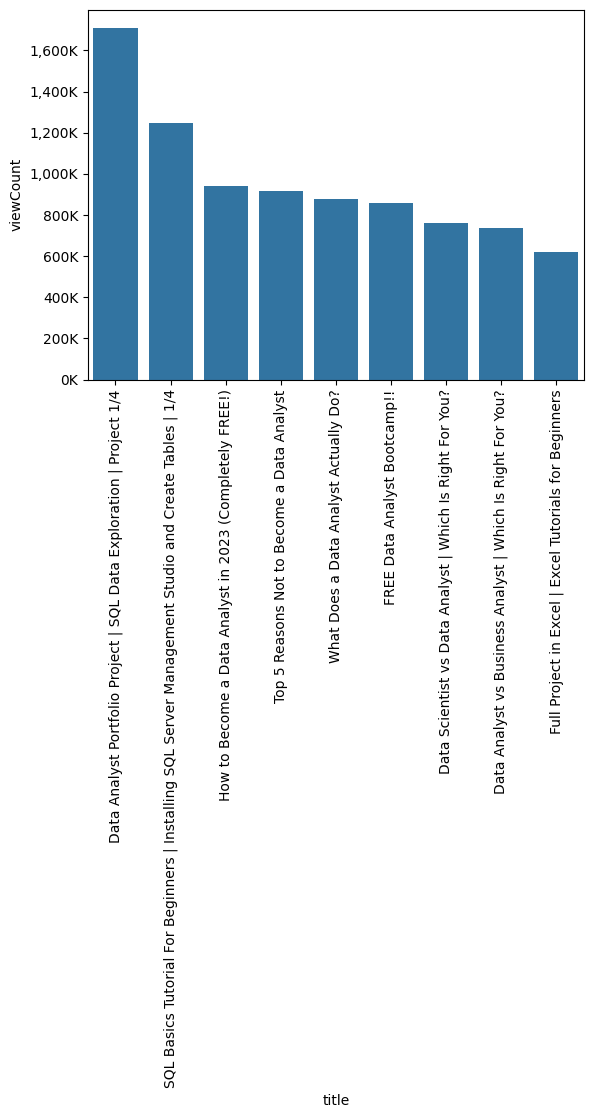

In [176]:
#Best performing videos
ax = sns.barplot(x='title', y='viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

C:\Users\nthkr\AppData\Local\Temp\ipykernel_2148\2146072681.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\nthkr\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 129401 (\U0001f979) missing from current font.
  func(*args, **kwargs)
C:\Users\nthkr\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129401 (\U0001f979) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


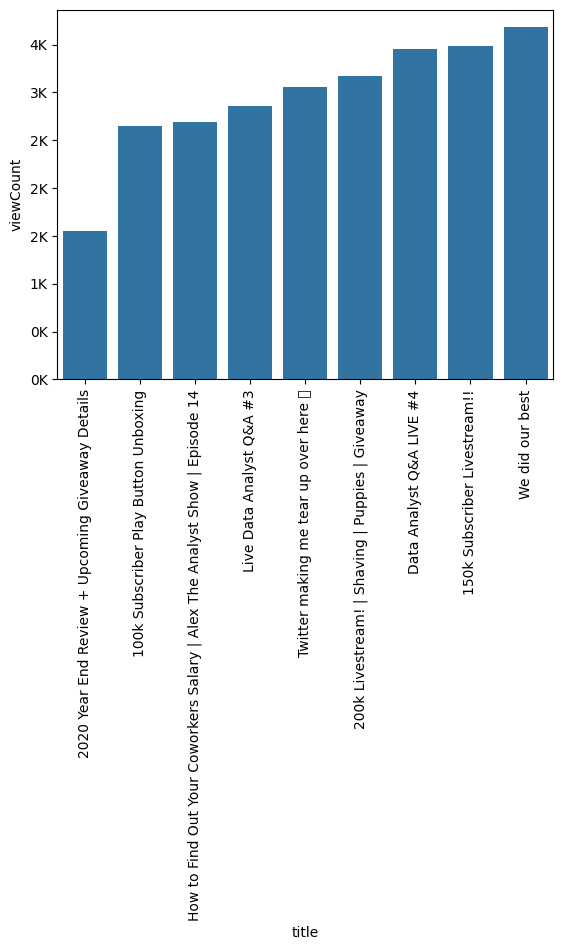

In [177]:
#Worst performing videos
ax = sns.barplot(x='title', y='viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

In [202]:
comments_df = comments_in_videos(youtube, video_ids)

In [204]:
comments_df.head(10)

,video_id,comments
0,FGC0cCAgGu0,[I am still benefitting you to be a data analy...
1,Vj6RqA_X-IE,[Just when I needed to understand more about '...
2,RYIiOG4LsvQ,[Question: What distinguishes MySQL from Fireb...
3,5y7tLNPVJPA,[Any advice for someone who just got their Goo...
4,_nf56aMPdZE,"[Thanks Alex for the video, great overview. I ..."
5,XbDRYzYUmMo,[I love Alex but that is the more irealistic w...
6,KRXSJb9ql1Y,[Can you show in mysql how to download csv fil...
7,iTQW_nDp938,[This nice program of yours is so good & has b...
8,lXQzD09BOH0,[“Let’s look at a very serious use case for se...
9,xtC3212t4hI,[I can verify his background in RT. We had cla...


### View distribution per video

<Axes: xlabel='channelTitle', ylabel='viewCount'>

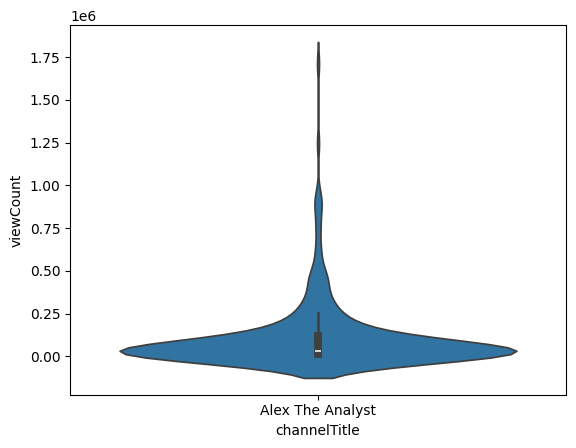

In [206]:
sns.violinplot(x='channelTitle', y='viewCount', data=video_df)

### Views vs. likes and comments

<Axes: xlabel='likeCount', ylabel='viewCount'>

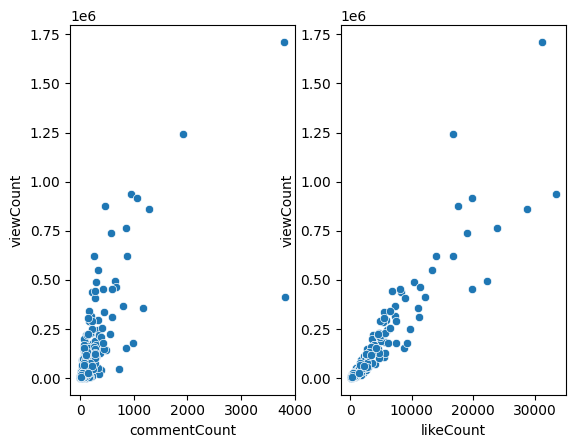

In [209]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y='viewCount', ax=ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y='viewCount', ax=ax[1])

### Video duration

<Axes: xlabel='durationSecs', ylabel='Count'>

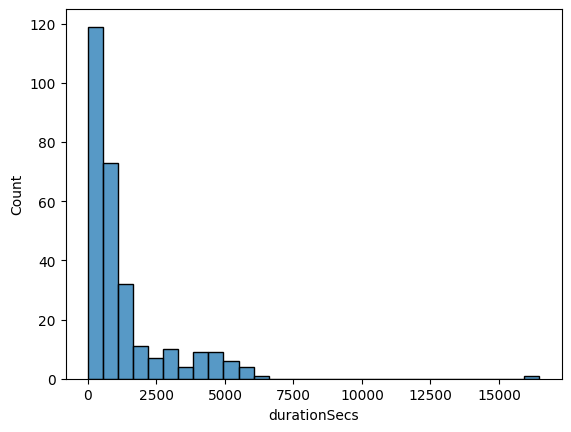

In [210]:
sns.histplot(data = video_df, x= 'durationSecs', bins=30)

In [216]:
day_df = pd.DataFrame(video_df['publishedAt'].value_counts())
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='publishedAt', rot=0)

KeyError: 'index'

In [215]:
video_df

,video_id,channelTitle,title,description,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,durationSecs
0,FGC0cCAgGu0,Alex The Analyst,Twitter making me tear up over here 🥹,,2024-02-23 13:34:27,3058,168,0,11,PT16S,hd,false,16.0
1,Vj6RqA_X-IE,Alex The Analyst,Subqueries in MySQL | Intermediate MySQL,Full MySQL Course: https://www.analystbuilder....,2024-02-20 13:00:32,5635,177,0,17,PT11M1S,hd,false,661.0
2,RYIiOG4LsvQ,Alex The Analyst,Case Statements in MySQL | Intermediate MySQL,Full MySQL Course: https://www.analystbuilder....,2024-02-13 13:00:19,5935,178,0,18,PT8M53S,hd,false,533.0
3,5y7tLNPVJPA,Alex The Analyst,We did our best,,2024-02-08 13:59:09,3680,162,0,5,PT9S,hd,false,9.0
4,_nf56aMPdZE,Alex The Analyst,"Microsoft Copilot Full Review | AI in Word, Po...",Microsoft Copilot is Microsoft's massive initi...,2024-02-06 13:00:35,29052,448,0,31,PT24M45S,hd,false,1485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,4rfr6A3lO-Y,Alex The Analyst,Data Analyst Resume | Reviewing My Resume! | F...,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30 14:07:55,68836,1617,0,64,PT7M33S,hd,false,453.0
282,OTq2NRy_AGs,Alex The Analyst,Working at a Big Company Vs Small Company | To...,Working at a Big Company Vs Small Company | To...,2020-01-25 16:38:39,14747,403,0,22,PT5M50S,hd,false,350.0
283,ya28cb3zFGE,Alex The Analyst,Data Analyst Salary | 100k with No Experience,Data Analyst Salary | 100k with No Experience ...,2020-01-23 03:16:09,63142,2172,0,227,PT5M3S,hd,false,303.0
284,Hsi2BG0SOiQ,Alex The Analyst,Truth About Big Companies | Told by a Fortune ...,Truth About Big Companies // There are a ton o...,2020-01-21 03:52:15,8494,316,0,18,PT5M45S,hd,false,345.0
